In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

require(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [4]:
#Measure pitch of all wav files in directory
import glob
# import numpy as np
# import pandas as pd
import parselmouth
from parselmouth.praat import call

In [5]:
# This is the function to measure voice pitch
def measurePitch(voiceID, f0min, f0max, unit):
    sound = parselmouth.Sound(voiceID) # read the sound
    pitch = call(sound, "To Pitch", 0.0, f0min, f0max) #create a praat pitch object
    meanF0 = call(pitch, "Get mean", 0, 0, unit) # get mean pitch
    stdevF0 = call(pitch, "Get standard deviation", 0 ,0, unit) # get standard deviation
    harmonicity = call(sound, "To Harmonicity (cc)", 0.01, 75, 0.1, 1.0)
    hnr = call(harmonicity, "Get mean", 0, 0)
    return meanF0, stdevF0, hnr

In [9]:
influencer_audio = glob.glob('../code/training/influencer_audio/*.mp3')
influencer_audio

['../code/training/influencer_audio/7094004328138067243.mp3',
 '../code/training/influencer_audio/7017066328842358021.mp3',
 '../code/training/influencer_audio/7366018710248672517.mp3',
 '../code/training/influencer_audio/6958587151793556742.mp3',
 '../code/training/influencer_audio/7293648321652985130.mp3',
 '../code/training/influencer_audio/7077566747318062382.mp3',
 '../code/training/influencer_audio/7205233800182271275.mp3',
 '../code/training/influencer_audio/7044307550761946414.mp3',
 '../code/training/influencer_audio/7370414643845549342.mp3',
 '../code/training/influencer_audio/7187523128644406571.mp3',
 '../code/training/influencer_audio/7228337648539061509.mp3',
 '../code/training/influencer_audio/7073541372002798890.mp3',
 '../code/training/influencer_audio/7098727274781904174.mp3',
 '../code/training/influencer_audio/7021521007458503942.mp3',
 '../code/training/influencer_audio/7277685183816633646.mp3',
 '../code/training/influencer_audio/7300089624154721579.mp3',
 '../cod

In [11]:
#show all columns
pd.set_option('display.max_columns', None)

In [12]:
df_anya = pd.read_csv('Anya_videos.csv')
df_anya.head()

,tiktok_url,AIGCDescription,challenges,collected,contents,createTime,desc,digged,diversificationId,duetDisplay,duetEnabled,forFriend,id,itemCommentStatus,officalItem,originalItem,privateItem,secret,shareEnabled,stitchDisplay,stitchEnabled,textExtra,author_avatarLarger,author_avatarMedium,author_avatarThumb,author_commentSetting,author_downloadSetting,author_duetSetting,author_ftc,author_id,author_isADVirtual,author_isEmbedBanned,author_nickname,author_openFavorite,author_privateAccount,author_relation,author_secUid,author_secret,author_signature,author_stitchSetting,author_uniqueId,author_verified,item_control_can_repost,music_album,music_authorName,music_coverLarge,music_coverMedium,music_coverThumb,music_duration,music_id,music_original,music_playUrl,music_title,stats_collectCount,stats_commentCount,stats_diggCount,stats_playCount,stats_shareCount,statsV2_collectCount,statsV2_commentCount,statsV2_diggCount,statsV2_playCount,statsV2_repostCount,statsV2_shareCount,video_VQScore,video_bitrate,video_bitrateInfo,video_codecType,video_cover,video_definition,video_downloadAddr,video_duration,video_dynamicCover,video_encodeUserTag,video_encodedType,video_format,video_height,video_id,video_originCover,video_playAddr,video_ratio,video_videoQuality,video_width,video_zoomCover_240,video_zoomCover_480,video_zoomCover_720,video_zoomCover_960,playlistId,adAuthorization,isAd,item_control_can_comment,item_control_can_creator_redirect,item_control_can_music_redirect,item_control_can_share,itemMute,video_subtitleInfos,video_volumeInfo_Loudness,video_volumeInfo_Peak,poi_address,poi_city,poi_cityCode,poi_country,poi_countryCode,poi_fatherPoiName,poi_id,poi_name,poi_province,poi_ttTypeCode,poi_ttTypeNameMedium,poi_ttTypeNameSuper,poi_ttTypeNameTiny,poi_typeCode,BAInfo,adLabelVersion,isECVideo,videoSuggestWordsList_video_suggest_words_struct,warnInfo,isPinnedItem,anchors,imagePost_cover_imageHeight,imagePost_cover_imageURL_urlList,imagePost_cover_imageWidth,imagePost_images,imagePost_shareCover_imageHeight,imagePost_shareCover_imageURL_urlList,imagePost_shareCover_imageWidth,imagePost_title
0,https://tiktok.com/@anya.bumag/video/692556567...,NaN,"[{'coverLarger': '', 'coverMedium': '', 'cover...",False,"[{'desc': 'Love this 3-in-1 😊 Also, *huge* giv...",1612483926,"Love this 3-in-1 😊 Also, *huge* giveaway comin...",False,10034.0,0,True,False,6925565671967296774,0,False,False,False,False,True,0,True,"[{'awemeId': '', 'end': 91, 'hashtagName': 'am...",https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,0,0,False,6823906335772967942,False,False,Anya,False,False,0,MS4wLjABAAAAoGMT_Iu0OKAQTjYQhW5vZM2HTc4v9kABa2...,False,"Gadgets, Decor etc. 🤍\n💌 anya@500mgmt.com\n✨Sh...",0,anya.bumag,False,True,In The End,Tommee Profitt & Fleurie & Mellen Gi,https://p16-sg.tiktokcdn.com/aweme/720x720/tos...,https://p16-sg.tiktokcdn.com/aweme/200x200/tos...,https://p16-sg.tiktokcdn.com/aweme/100x100/tos...,46.0,6611368749150767874,False,https://sf16-ies-music-sg.tiktokcdn.com/obj/to...,In The End - Mellen Gi Remix,2240,54,22800,387900,591,2240,54,22800,387900,0,591,0,957213.0,"[{'Bitrate': 957213, 'CodecType': 'h264', 'Gea...",h264,https://p16-sign-va.tiktokcdn.com/obj/tos-mali...,540p,https://v16-webapp-prime.us.tiktok.com/video/t...,15,https://p16-sign-va.tiktokcdn.com/obj/tos-mali...,NaN,normal,mp4,960,6925565671967296774,https://p16-sign-va.tiktokcdn.com/obj/tos-mali...,https://v16-webapp-prime.us.tiktok.com/video/t...,540p,normal,540,https://p16-sign-va.tiktokcdn.com/tos-maliva-p...,https://p16-sign-va.tiktokcdn.com/tos-maliva-p...,https://p16-sign-va.tiktokcdn.com/tos-maliva-p...,https://p16-sign-va.tiktokcdn.com/tos-maliva-p...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://tiktok.com/@anya.bumag/video/692371262...,NaN,"[{'coverLarger': '', 'co

In [15]:
df_anya_filtered = df_anya[['id','author_nickname','author_uniqueId','stats_collectCount','stats_commentCount', 'stats_diggCount','stats_shareCount',	'stats_playCount', 'video_duration', 'isAd']]

In [16]:
df_arielle = pd.read_csv('ariellebrimhall_videos.csv')
df_arielle.head()

,tiktok_url,AIGCDescription,challenges,collected,contents,createTime,desc,digged,duetDisplay,duetEnabled,forFriend,id,itemCommentStatus,officalItem,originalItem,privateItem,secret,shareEnabled,stitchDisplay,stitchEnabled,textExtra,author_avatarLarger,author_avatarMedium,author_avatarThumb,author_commentSetting,author_downloadSetting,author_duetSetting,author_ftc,author_id,author_isADVirtual,author_isEmbedBanned,author_nickname,author_openFavorite,author_privateAccount,author_relation,author_secUid,author_secret,author_signature,author_stitchSetting,author_uniqueId,author_verified,item_control_can_repost,music_album,music_authorName,music_coverLarge,music_coverMedium,music_coverThumb,music_duration,music_id,music_original,music_title,stats_collectCount,stats_commentCount,stats_diggCount,stats_playCount,stats_shareCount,statsV2_collectCount,statsV2_commentCount,statsV2_diggCount,statsV2_playCount,statsV2_repostCount,statsV2_shareCount,video_VQScore,video_bitrate,video_bitrateInfo,video_codecType,video_cover,video_definition,video_downloadAddr,video_duration,video_dynamicCover,video_encodeUserTag,video_encodedType,video_format,video_height,video_id,video_originCover,video_playAddr,video_ratio,video_videoQuality,video_volumeInfo_Loudness,video_volumeInfo_Peak,video_width,video_zoomCover_240,video_zoomCover_480,video_zoomCover_720,video_zoomCover_960,music_playUrl,diversificationId,video_subtitleInfos,playlistId,anchors,adLabelVersion,adAuthorization,isAd,item_control_can_comment,item_control_can_creator_redirect,item_control_can_music_redirect,item_control_can_share,itemMute,poi_address,poi_city,poi_cityCode,poi_country,poi_countryCode,poi_fatherPoiName,poi_id,poi_name,poi_province,poi_ttTypeCode,poi_ttTypeNameMedium,poi_ttTypeNameSuper,poi_ttTypeNameTiny,poi_typeCode,BAInfo,isECVideo,music_scheduleSearchTime,duetInfo_duetFromId,videoSuggestWordsList_video_suggest_words_struct,warnInfo,isPinnedItem,imagePost_cover_imageHeight,imagePost_cover_imageURL_urlList,imagePost_cover_imageWidth,imagePost_images,imagePost_shareCover_imageHeight,imagePost_shareCover_imageURL_urlList,imagePost_shareCover_imageWidth,imagePost_title
0,https://tiktok.com/@ariellebrimhall/video/7125...,NaN,"[{'coverLarger': '', 'coverMedium': '', 'cover...",False,[{'desc': 'everything in my amazon storefront ...,1659050303,everything in my amazon storefront #amazondorm...,False,0,True,False,7125566784958106926,0,False,False,False,False,True,0,True,"[{'awemeId': '', 'end': 51, 'hashtagName': 'am...",https://p19-pu-sign-useast8.tiktokcdn-us.com/t...,https://p16-pu-sign-useast8.tiktokcdn-us.com/t...,https://p19-pu-sign-useast8.tiktokcdn-us.com/t...,0,0,0,False,6907257263154971653,False,False,AMAZON FINDS,False,False,0,MS4wLjABAAAAL88tp6xEG4omf2EsYDEouVXDHi4kvlCKHa...,False,Amazon Influencer | IG @ariellebrimhall\nCLICK...,0,ariellebrimhall,False,True,NaN,TimTaj,https://p16-sign-sg.tiktokcdn.com/tos-alisg-v-...,https://p16-sign-sg.tiktokcdn.com/tos-alisg-v-...,https://p16-sign-sg.tiktokcdn.com/tos-alisg-v-...,135.0,6817342688401033218,False,Summer day,29,0,85,5796,10,29,0,85,5796,0,10,0.0,159659.0,"[{'Bitrate': 173371, 'CodecType': 'h265_hvc1',...",h264,https://p16-pu-sign-useast8.tiktokcdn-us.com/o...,540p,https://v16-webapp-prime.us.tiktok.com/video/t...,16,https://p19-sign.tiktokcdn-us.com/obj/tos-usea...,NaN,normal,mp4,1024,7125566784958106926,https://p19-sign.tiktokcdn-us.com/obj/tos-usea...,https://v16-webapp-prime.us.tiktok.com/video/t...,540p,normal,-11.6,1.00000,576,https://p19-pu-sign-useast8.tiktokcdn-us.com/t...,https://p19-pu-sign-useast8.tiktokcdn-us.com/t...,https://p19-pu-sign-useast8.tiktokcdn-us.com/t...,https://p19-pu-sign-useast8.tiktokcdn-us.com/t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://tiktok.com/@ariellebrimhall/video/7125...,NaN,[{'coverLarger': 'https://p16-amd-va.tiktokcdn...,False,"[{'desc': ""it's legi

In [17]:
df_arielle_filtered = df_arielle[['id','author_nickname','author_uniqueId','stats_collectCount','stats_commentCount', 'stats_diggCount','stats_shareCount',	'stats_playCount', 'video_duration', 'isAd']]
df_arielle_filtered.head()

,id,author_nickname,author_uniqueId,stats_collectCount,stats_commentCount,stats_diggCount,stats_shareCount,stats_playCount,video_duration,isAd
0,7125566784958106926,AMAZON FINDS,ariellebrimhall,29,0,85,10,5796,16,NaN
1,7125202712618143019,AMAZON FINDS,ariellebrimhall,30,4,84,11,4872,35,NaN
2,7125087282700324138,AMAZON FINDS,ariellebrimhall,14,2,42,4,4228,33,NaN
3,7125072000577588522,AMAZON FINDS,ariellebrimhall,17,1,52,6,4567,12,NaN
4,7124789423274822954,AMAZON FINDS,ariellebrimhall,50,1,172,25,5824,22,NaN


In [18]:
df_envy = pd.read_csv('everythingenvy_videos.csv')
df_envy.head()

,tiktok_url,AIGCDescription,challenges,collected,contents,createTime,desc,digged,duetDisplay,duetEnabled,forFriend,id,itemCommentStatus,officalItem,originalItem,privateItem,secret,shareEnabled,stitchDisplay,stitchEnabled,textExtra,author_avatarLarger,author_avatarMedium,author_avatarThumb,author_commentSetting,author_downloadSetting,author_duetSetting,author_ftc,author_id,author_isADVirtual,author_isEmbedBanned,author_nickname,author_openFavorite,author_privateAccount,author_relation,author_secUid,author_secret,author_signature,author_stitchSetting,author_uniqueId,author_verified,item_control_can_repost,music_album,music_authorName,music_coverLarge,music_coverMedium,music_coverThumb,music_duration,music_id,music_original,music_title,stats_collectCount,stats_commentCount,stats_diggCount,stats_playCount,stats_shareCount,statsV2_collectCount,statsV2_commentCount,statsV2_diggCount,statsV2_playCount,statsV2_repostCount,statsV2_shareCount,video_VQScore,video_bitrate,video_bitrateInfo,video_codecType,video_cover,video_definition,video_downloadAddr,video_duration,video_dynamicCover,video_encodeUserTag,video_encodedType,video_format,video_height,video_id,video_originCover,video_playAddr,video_ratio,video_videoQuality,video_volumeInfo_Loudness,video_volumeInfo_Peak,video_width,video_zoomCover_240,video_zoomCover_480,video_zoomCover_720,video_zoomCover_960,music_playUrl,diversificationId,video_subtitleInfos,adLabelVersion,adAuthorization,isAd,item_control_can_comment,item_control_can_creator_redirect,item_control_can_music_redirect,item_control_can_share,itemMute,playlistId,music_scheduleSearchTime,poi_address,poi_city,poi_cityCode,poi_country,poi_countryCode,poi_fatherPoiName,poi_id,poi_name,poi_province,poi_ttTypeCode,poi_ttTypeNameMedium,poi_ttTypeNameSuper,poi_ttTypeNameTiny,poi_typeCode,BAInfo,isECVideo,videoSuggestWordsList_video_suggest_words_struct,anchors,warnInfo,isPinnedItem,imagePost_cover_imageHeight,imagePost_cover_imageURL_urlList,imagePost_cover_imageWidth,imagePost_images,imagePost_shareCover_imageHeight,imagePost_shareCover_imageURL_urlList,imagePost_shareCover_imageWidth,imagePost_title
0,https://tiktok.com/@everythingenvy/video/70338...,NaN,[{'coverLarger': 'https://p16-amd-va.tiktokcdn...,False,[{'desc': 'How to make a handmade bow! #wrappi...,1637693876,How to make a handmade bow! #wrappinggifts #wr...,False,0,True,False,7033841630654549294,0,False,False,False,False,True,0,True,"[{'awemeId': '', 'end': 42, 'hashtagName': 'wr...",https://p16-sign.tiktokcdn-us.com/tos-useast5-...,https://p16-sign.tiktokcdn-us.com/tos-useast5-...,https://p16-sign.tiktokcdn-us.com/tos-useast5-...,0,0,0,False,6875149358373176325,False,False,Margaret & Stetson,False,False,0,MS4wLjABAAAAdK-fCBiHfDnxlcqWI8k0t8JSvC2zZ2elAJ...,False,"Mother-daughter duo\nAmazon finds, home organi...",0,everythingenvy,False,True,We Wish You a Merry Christmas,Merry Christmas,https://p16-sign-sg.tiktokcdn.com/tos-alisg-v-...,https://p16-sign-sg.tiktokcdn.com/tos-alisg-v-...,https://p16-sign-sg.tiktokcdn.com/tos-alisg-v-...,29.0,6709421144174233602,False,We Wish You a Merry Christmas,121,4,630,17000,67,121,4,630,17000,0,67,0.0,1453478.0,"[{'Bitrate': 1453478, 'CodecType': 'h264', 'Ge...",h264,https://p16-sign.tiktokcdn-us.com/obj/tos-usea...,540p,https://v16-webapp-prime.us.tiktok.com/video/t...,12,https://p16-pu-sign-useast8.tiktokcdn-us.com/o...,NaN,normal,mp4,1024,7033841630654549294,https://p19-pu-sign-useast8.tiktokcdn-us.com/o...,https://v16-webapp-prime.us.tiktok.com/video/t...,540p,normal,-12.9,0.89125,576,https://p19-sign.tiktokcdn-us.com/tos-useast5-...,https://p16-sign.tiktokcdn-us.com/tos-useast5-...,https://p19-sign.tiktokcdn-us.com/tos-useast5-...,https://p16-sign.tiktokcdn-us.com/tos-useast5-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://tiktok.com/@everythingenvy/video/70334...,NaN,"[{'coverLarger': '', 'coverMedium': 

In [19]:
df_envy_filtered = df_envy[['id','author_nickname','author_uniqueId','stats_collectCount','stats_commentCount', 'stats_diggCount','stats_shareCount',	'stats_playCount', 'video_duration', 'isAd']]
df_envy_filtered.head()

,id,author_nickname,author_uniqueId,stats_collectCount,stats_commentCount,stats_diggCount,stats_shareCount,stats_playCount,video_duration,isAd
0,7033841630654549294,Margaret & Stetson,everythingenvy,121,4,630,67,17000,12,NaN
1,7033452496534293807,Margaret & Stetson,everythingenvy,88,0,658,77,28900,14,NaN
2,7032013929412922670,Margaret & Stetson,everythingenvy,60,2,848,64,34700,17,NaN
3,7031991543846194479,Margaret & Stetson,everythingenvy,49,0,602,9,17000,17,NaN
4,7031688952398761263,Margaret & Stetson,everythingenvy,35,3,420,26,16200,11,NaN


In [20]:
df_jared = pd.read_csv('jaredandersen_videos.csv')
df_jared.head()

,tiktok_url,AIGCDescription,challenges,collected,contents,createTime,desc,digged,diversificationId,duetDisplay,duetEnabled,forFriend,id,itemCommentStatus,officalItem,originalItem,privateItem,secret,shareEnabled,stitchDisplay,stitchEnabled,textExtra,author_avatarLarger,author_avatarMedium,author_avatarThumb,author_commentSetting,author_downloadSetting,author_duetSetting,author_ftc,author_id,author_isADVirtual,author_isEmbedBanned,author_nickname,author_openFavorite,author_privateAccount,author_relation,author_secUid,author_secret,author_signature,author_stitchSetting,author_uniqueId,author_verified,item_control_can_repost,music_authorName,music_coverLarge,music_coverMedium,music_coverThumb,music_duration,music_id,music_original,music_playUrl,music_title,stats_collectCount,stats_commentCount,stats_diggCount,stats_playCount,stats_shareCount,statsV2_collectCount,statsV2_commentCount,statsV2_diggCount,statsV2_playCount,statsV2_repostCount,statsV2_shareCount,video_bitrate,video_bitrateInfo,video_codecType,video_cover,video_definition,video_downloadAddr,video_duration,video_dynamicCover,video_encodeUserTag,video_encodedType,video_format,video_height,video_id,video_originCover,video_playAddr,video_ratio,video_subtitleInfos,video_videoQuality,video_volumeInfo_Loudness,video_volumeInfo_Peak,video_width,video_zoomCover_240,video_zoomCover_480,video_zoomCover_720,video_zoomCover_960,playlistId,adAuthorization,isAd,item_control_can_comment,item_control_can_creator_redirect,item_control_can_music_redirect,item_control_can_share,music_album,poi_address,poi_city,poi_cityCode,poi_country,poi_countryCode,poi_fatherPoiName,poi_id,poi_name,poi_province,poi_ttTypeCode,poi_ttTypeNameMedium,poi_ttTypeNameSuper,poi_ttTypeNameTiny,poi_typeCode,BAInfo,adLabelVersion,isECVideo,videoSuggestWordsList_video_suggest_words_struct,warnInfo,isPinnedItem,anchors,itemMute,imagePost_cover_imageHeight,imagePost_cover_imageURL_urlList,imagePost_cover_imageWidth,imagePost_images,imagePost_shareCover_imageHeight,imagePost_shareCover_imageURL_urlList,imagePost_shareCover_imageWidth,imagePost_title
0,https://tiktok.com/@stuffyouactuallyneed/video...,NaN,"[{'coverLarger': '', 'coverMedium': '', 'cover...",False,[{'desc': 'Amazon gift ideas! #amazon #amazonf...,1695850546,Amazon gift ideas! #amazon #amazonfinds #found...,False,10059.0,0,True,False,7283622590445276459,0,False,False,False,False,True,0,True,"[{'awemeId': '', 'end': 26, 'hashtagName': 'am...",https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,0,0,False,6837674956211454982,False,False,Jared Andersen,False,False,0,MS4wLjABAAAAY8uhfOCbSzWHO3ih0eJ0Z_nHenk-DpLCir...,False,Email ➡️Aaron@undercurrent.net,0,stuffyouactuallyneed,False,True,Heinz Kiessling,https://p16-sg.tiktokcdn.com/aweme/720x720/tos...,https://p16-sg.tiktokcdn.com/aweme/200x200/tos...,https://p16-sg.tiktokcdn.com/aweme/100x100/tos...,60,6778968637492430849,False,https://sf16-ies-music-sg.tiktokcdn.com/obj/to...,Blue Blood,557,16,5615,84600,75,557,16,5615,84600,0,75,1114256.0,"[{'Bitrate': 1183054, 'CodecType': 'h265_hvc1'...",h264,https://p16-sign.tiktokcdn-us.com/obj/tos-usea...,540p,https://v16-webapp-prime.us.tiktok.com/video/t...,27,https://p16-sign.tiktokcdn-us.com/obj/tos-usea...,NaN,normal,mp4,1024,7283622590445276459,https://p19-sign.tiktokcdn-us.com/obj/tos-usea...,https://v16-webapp-prime.us.tiktok.com/video/t...,540p,"[{'Format': 'webvtt', 'LanguageCodeName': 'por...",normal,-15.4,1.00000,576,https://p16-sign.tiktokcdn-us.com/tos-useast5-...,https://p19-sign.tiktokcdn-us.com/tos-useast5-...,https://p19-sign.tiktokcdn-us.com/tos-useast5-...,https://p19-sign.tiktokcdn-us.com/tos-useast5-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,It's Always Sunny In Philadelphia (Music from ...,"Salt Lake City, UT 84116, United States",Salt Lake City,5780993.0,NaN,6252001.0,Salt Lake City,2.044240e+16,Utah! Gift shop,NaN,06b8a0,Gift Shop,Shopping,Other Gift Shop,NaN,N

In [21]:
df_jared_filtered = df_jared[['id','author_nickname','author_uniqueId','stats_collectCount','stats_commentCount', 'stats_diggCount','stats_shareCount',	'stats_playCount', 'video_duration', 'isAd']]
df_jared_filtered.head()

,id,author_nickname,author_uniqueId,stats_collectCount,stats_commentCount,stats_diggCount,stats_shareCount,stats_playCount,video_duration,isAd
0,7283622590445276459,Jared Andersen,stuffyouactuallyneed,557,16,5615,75,84600,27,NaN
1,7283219303581781294,Jared Andersen,stuffyouactuallyneed,1759,25,14000,237,164400,39,NaN
2,7282863691387751723,Jared Andersen,stuffyouactuallyneed,44,42,1551,109,629600,68,True
3,7282444811318234414,Jared Andersen,stuffyouactuallyneed,432,16,5676,172,76700,44,NaN
4,7282049103398292778,Jared Andersen,stuffyouactuallyneed,969,16,9308,141,122900,65,NaN


In [22]:
df_justice = pd.read_csv('justicebuys_videos.csv')
df_justice.head()

,tiktok_url,AIGCDescription,challenges,collected,contents,createTime,desc,digged,diversificationId,duetDisplay,duetEnabled,forFriend,id,itemCommentStatus,officalItem,originalItem,privateItem,secret,shareEnabled,stitchDisplay,stitchEnabled,textExtra,author_avatarLarger,author_avatarMedium,author_avatarThumb,author_commentSetting,author_downloadSetting,author_duetSetting,author_ftc,author_id,author_isADVirtual,author_isEmbedBanned,author_nickname,author_openFavorite,author_privateAccount,author_relation,author_secUid,author_secret,author_signature,author_stitchSetting,author_uniqueId,author_verified,item_control_can_repost,music_authorName,music_coverLarge,music_coverMedium,music_coverThumb,music_duration,music_id,music_original,music_playUrl,music_title,stats_collectCount,stats_commentCount,stats_diggCount,stats_playCount,stats_shareCount,statsV2_collectCount,statsV2_commentCount,statsV2_diggCount,statsV2_playCount,statsV2_repostCount,statsV2_shareCount,video_bitrate,video_bitrateInfo,video_codecType,video_cover,video_definition,video_downloadAddr,video_duration,video_dynamicCover,video_encodeUserTag,video_encodedType,video_format,video_height,video_id,video_originCover,video_playAddr,video_ratio,video_subtitleInfos,video_videoQuality,video_volumeInfo_Loudness,video_volumeInfo_Peak,video_width,video_zoomCover_240,video_zoomCover_480,video_zoomCover_720,video_zoomCover_960,playlistId,adAuthorization,isAd,item_control_can_comment,item_control_can_creator_redirect,item_control_can_music_redirect,item_control_can_share,music_album,BAInfo,adLabelVersion,poi_address,poi_city,poi_cityCode,poi_country,poi_countryCode,poi_fatherPoiName,poi_id,poi_name,poi_province,poi_ttTypeCode,poi_ttTypeNameMedium,poi_ttTypeNameSuper,poi_ttTypeNameTiny,poi_typeCode,videoSuggestWordsList_video_suggest_words_struct,isPinnedItem,anchors,warnInfo,isECVideo,itemMute
0,https://tiktok.com/@justicebuys/video/72067207...,NaN,"[{'coverLarger': '', 'coverMedium': '', 'cover...",False,[{'desc': 'Which one was your fav? 🤔🙌🏼 #amazon...,1677945454,Which one was your fav? 🤔🙌🏼 #amazon #prime #pr...,False,10044.0,0,True,False,7206720782423084331,0,False,False,False,False,True,0,True,"[{'awemeId': '', 'end': 38, 'hashtagName': 'am...",https://p16-sign.tiktokcdn-us.com/tos-useast5-...,https://p16-sign.tiktokcdn-us.com/tos-useast5-...,https://p19-sign.tiktokcdn-us.com/tos-useast5-...,0,0,0,False,7155954783169496106,False,False,Justice Buys,False,False,0,MS4wLjABAAAAPJ61j_yk0kkKnyG0Jqe0echqNgDDRYnLqx...,False,Product reviews 📦\nAmazon finds 🔥\nAll product...,0,justicebuys,False,True,Justice Buys,https://p16-sign.tiktokcdn-us.com/tos-useast5-...,https://p16-sign.tiktokcdn-us.com/tos-useast5-...,https://p19-sign.tiktokcdn-us.com/tos-useast5-...,53,7206720816670001962,False,https://v16-webapp-prime.us.tiktok.com/video/t...,original sound,59900,1078,576900,5200000,4533,59912,1078,576900,5200000,0,4533,1087392,"[{'Bitrate': 1178960, 'CodecType': 'h264', 'Ge...",h264,https://p19-sign.tiktokcdn-us.com/tos-useast5-...,720p,https://v16-webapp-prime.us.tiktok.com/video/t...,53,https://p16-sign.tiktokcdn-us.com/obj/tos-usea...,NaN,normal,mp4,1280,7206720782423084331,https://p16-sign.tiktokcdn-us.com/obj/tos-usea...,https://v16-webapp-prime.us.tiktok.com/video/t...,720p,"[{'Format': 'webvtt', 'LanguageCodeName': 'rus...",normal,-13.0,1.00000,720,https://p16-sign.tiktokcdn-us.com/tos-useast5-...,https://p16-sign.tiktokcdn-us.com/tos-useast5-...,https://p16-sign.tiktokcdn-us.com/tos-useast5-...,https://p16-sign.tiktokcdn-us.com/tos-useast5-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://tiktok.com/@justicebuys/video/72056657...,NaN,"[{'coverLarger': '', 'coverMedium': '', 'cover...",False,[{'desc': 'AliExpress has 3 items for $1 deal ...,1677699801,AliExpress has 3 items for $1 deal 👀🔥#AliExpre...,False,NaN,0,True,False,7205665723681721642,0,False,False,False,False,True,0,True,"[{'awemeId': '', 'end': 

In [23]:
df_justice_filtered = df_justice[['id','author_nickname','author_uniqueId','stats_collectCount','stats_commentCount', 'stats_diggCount','stats_shareCount',	'stats_playCount', 'video_duration', 'isAd']]
df_justice_filtered.head()

,id,author_nickname,author_uniqueId,stats_collectCount,stats_commentCount,stats_diggCount,stats_shareCount,stats_playCount,video_duration,isAd
0,7206720782423084331,Justice Buys,justicebuys,59900,1078,576900,4533,5200000,53,NaN
1,7205665723681721642,Justice Buys,justicebuys,3291,34,18500,442,475500,30,True
2,7205301264316370218,Justice Buys,justicebuys,13000,182,103900,3719,2600000,20,NaN
3,7204899365985537326,Justice Buys,justicebuys,3391,31,16800,817,301700,28,NaN
4,7204575362406173995,Justice Buys,justicebuys,13200,276,55300,2775,1200000,14,NaN


In [24]:
df_sam = pd.read_csv('samshanshops_videos.csv')
df_sam.head()

,tiktok_url,AIGCDescription,challenges,collected,contents,createTime,desc,digged,diversificationId,duetDisplay,duetEnabled,forFriend,id,itemCommentStatus,officalItem,originalItem,privateItem,secret,shareEnabled,stitchDisplay,stitchEnabled,textExtra,author_avatarLarger,author_avatarMedium,author_avatarThumb,author_commentSetting,author_downloadSetting,author_duetSetting,author_ftc,author_id,author_isADVirtual,author_isEmbedBanned,author_nickname,author_openFavorite,author_privateAccount,author_relation,author_secUid,author_secret,author_signature,author_stitchSetting,author_uniqueId,author_verified,item_control_can_repost,music_authorName,music_coverLarge,music_coverMedium,music_coverThumb,music_duration,music_id,music_original,music_playUrl,music_title,stats_collectCount,stats_commentCount,stats_diggCount,stats_playCount,stats_shareCount,statsV2_collectCount,statsV2_commentCount,statsV2_diggCount,statsV2_playCount,statsV2_repostCount,statsV2_shareCount,video_bitrate,video_bitrateInfo,video_codecType,video_cover,video_definition,video_downloadAddr,video_duration,video_dynamicCover,video_encodeUserTag,video_encodedType,video_format,video_height,video_id,video_originCover,video_playAddr,video_ratio,video_subtitleInfos,video_videoQuality,video_volumeInfo_Loudness,video_volumeInfo_Peak,video_width,video_zoomCover_240,video_zoomCover_480,video_zoomCover_720,video_zoomCover_960,playlistId,adAuthorization,isAd,item_control_can_comment,item_control_can_creator_redirect,item_control_can_music_redirect,item_control_can_share,music_album,poi_address,poi_city,poi_cityCode,poi_country,poi_countryCode,poi_fatherPoiName,poi_id,poi_name,poi_province,poi_ttTypeCode,poi_ttTypeNameMedium,poi_ttTypeNameSuper,poi_ttTypeNameTiny,poi_typeCode,BAInfo,adLabelVersion,videoSuggestWordsList_video_suggest_words_struct,isPinnedItem,anchors,warnInfo,itemMute
0,https://tiktok.com/@sam.shan.shops/video/73326...,NaN,"[{'coverLarger': '', 'coverMedium': '', 'cover...",False,[{'desc': 'Saves so much clean up time 🎨🤯 #ama...,1707255863,Saves so much clean up time 🎨🤯 #amazonhomefind...,False,10034.0,0,True,False,7332608082767367429,0,False,False,False,False,True,0,True,"[{'awemeId': '', 'end': 49, 'hashtagName': 'am...",https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,0,0,False,7111786018798552070,False,False,Sam Shan Shops 🦋,False,False,0,MS4wLjABAAAAGFqDazB3wBXQPCprmU_vgOEKSjheOTA8Ro...,False,Amazon 🇨🇦🇺🇸🇬🇧 Finds\n💌 samshanshops@rewiredtal...,0,sam.shan.shops,False,True,Sam Shan Shops 🦋,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,19,7332608098397276933,False,https://v16-webapp-prime.us.tiktok.com/video/t...,original sound,7212,39,27000,474400,1275,7212,39,27000,474400,0,1275,1025966,"[{'Bitrate': 1025966, 'CodecType': 'h264', 'Ge...",h264,https://p16-sign-va.tiktokcdn.com/obj/tos-mali...,540p,https://v16-webapp-prime.us.tiktok.com/video/t...,19,https://p16-sign-va.tiktokcdn.com/obj/tos-mali...,NaN,normal,mp4,1024,7332608082767367429,https://p16-sign-va.tiktokcdn.com/obj/tos-mali...,https://v16-webapp-prime.us.tiktok.com/video/t...,540p,"[{'Format': 'webvtt', 'LanguageCodeName': 'spa...",normal,-25.7,0.32734,576,https://p16-sign-va.tiktokcdn.com/tos-maliva-p...,https://p16-sign-va.tiktokcdn.com/tos-maliva-p...,https://p16-sign-va.tiktokcdn.com/tos-maliva-p...,https://p16-sign-va.tiktokcdn.com/tos-maliva-p...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://tiktok.com/@sam.shan.shops/video/73314...,NaN,"[{'coverLarger': '', 'coverMedium': '', 'cover...",False,[{'desc': 'These cameras bring so much peace o...,1706977561,These cameras bring so much peace of mind 😅📸 #...,False,10067.0,0,True,False,7331412785332555014,0,False,False,False,False,True,0,True,"[{'awemeId': '', 'end': 66, 'hash

In [25]:
df_sam_filtered = df_sam[['id','author_nickname','author_uniqueId','stats_collectCount','stats_commentCount', 'stats_diggCount','stats_shareCount',	'stats_playCount', 'video_duration', 'isAd']]
df_sam_filtered.head()

,id,author_nickname,author_uniqueId,stats_collectCount,stats_commentCount,stats_diggCount,stats_shareCount,stats_playCount,video_duration,isAd
0,7332608082767367429,Sam Shan Shops 🦋,sam.shan.shops,7212,39,27000,1275,474400,19,NaN
1,7331412785332555014,Sam Shan Shops 🦋,sam.shan.shops,22700,174,77100,6008,1600000,16,NaN
2,7331158783403560197,Sam Shan Shops 🦋,sam.shan.shops,7971,37,35400,1161,612900,16,NaN
3,7330785546714811654,Sam Shan Shops 🦋,sam.shan.shops,905,29,6080,144,209600,23,NaN
4,7330273850527059206,Sam Shan Shops 🦋,sam.shan.shops,6137,68,32600,516,842800,18,NaN


In [26]:
df_sarah = pd.read_csv('sarahlindner_videos.csv')
df_sarah.head()

,tiktok_url,AIGCDescription,challenges,collected,contents,createTime,desc,digged,duetDisplay,duetEnabled,forFriend,id,itemCommentStatus,officalItem,originalItem,privateItem,secret,shareEnabled,stitchDisplay,stitchEnabled,textExtra,author_avatarLarger,author_avatarMedium,author_avatarThumb,author_commentSetting,author_downloadSetting,author_duetSetting,author_ftc,author_id,author_isADVirtual,author_isEmbedBanned,author_nickname,author_openFavorite,author_privateAccount,author_relation,author_secUid,author_secret,author_signature,author_stitchSetting,author_uniqueId,author_verified,item_control_can_repost,music_album,music_authorName,music_coverLarge,music_coverMedium,music_coverThumb,music_duration,music_id,music_original,music_title,stats_collectCount,stats_commentCount,stats_diggCount,stats_playCount,stats_shareCount,statsV2_collectCount,statsV2_commentCount,statsV2_diggCount,statsV2_playCount,statsV2_repostCount,statsV2_shareCount,video_VQScore,video_bitrate,video_bitrateInfo,video_codecType,video_cover,video_definition,video_downloadAddr,video_duration,video_dynamicCover,video_encodeUserTag,video_encodedType,video_format,video_height,video_id,video_originCover,video_playAddr,video_ratio,video_videoQuality,video_volumeInfo_Loudness,video_volumeInfo_Peak,video_width,video_zoomCover_240,video_zoomCover_480,video_zoomCover_720,video_zoomCover_960,music_playUrl,diversificationId,video_subtitleInfos,adLabelVersion,adAuthorization,isAd,item_control_can_comment,item_control_can_creator_redirect,item_control_can_music_redirect,item_control_can_share,itemMute,playlistId,poi_address,poi_city,poi_cityCode,poi_country,poi_countryCode,poi_fatherPoiName,poi_id,poi_name,poi_province,poi_ttTypeCode,poi_ttTypeNameMedium,poi_ttTypeNameSuper,poi_ttTypeNameTiny,poi_typeCode,BAInfo,isECVideo,music_scheduleSearchTime,videoSuggestWordsList_video_suggest_words_struct,anchors,warnInfo,isPinnedItem,imagePost_cover_imageHeight,imagePost_cover_imageURL_urlList,imagePost_cover_imageWidth,imagePost_images,imagePost_shareCover_imageHeight,imagePost_shareCover_imageURL_urlList,imagePost_shareCover_imageWidth,imagePost_title
0,https://tiktok.com/@thehouseofsequins/video/69...,NaN,"[{'coverLarger': '', 'coverMedium': '', 'cover...",False,[{'desc': '#ad Easy smoothie bowl recipe with ...,1627570724,#ad Easy smoothie bowl recipe with my Braun Tr...,False,0,True,False,6990363027640028422,0,False,False,False,False,True,0,True,"[{'awemeId': '', 'end': 3, 'hashtagName': 'ad'...",https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,0,0,0,False,6770891217455907846,False,False,Sarah Lindner,False,False,0,MS4wLjABAAAAhcpRQDZWjA7KsA9k7Mq2BERUxc5ry_1tje...,False,Thehouseofsequins@viralnationtalent.com\nLinks...,0,thehouseofsequins,False,True,NaN,Sarah Lindner,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...,25.0,6990362843828734725,False,original sound,60,8,975,18700,36,60,8,975,18700,0,36,0,1705044.0,"[{'Bitrate': 1705044, 'CodecType': 'h264', 'Ge...",h264,https://p16-sign-va.tiktokcdn.com/obj/tos-mali...,540p,https://v16-webapp-prime.us.tiktok.com/video/t...,25,https://p16-sign-va.tiktokcdn.com/obj/tos-mali...,NaN,normal,mp4,1024,6990363027640028422,https://p16-sign-va.tiktokcdn.com/obj/tos-mali...,https://v16-webapp-prime.us.tiktok.com/video/t...,540p,normal,-13.8,0.93325,576,https://p16-sign-va.tiktokcdn.com/tos-maliva-p...,https://p16-sign-va.tiktokcdn.com/tos-maliva-p...,https://p16-sign-va.tiktokcdn.com/tos-maliva-p...,https://p16-sign-va.tiktokcdn.com/tos-maliva-p...,https://v16-webapp-prime.us.tiktok.com/video/t...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://tiktok.com/@thehouseofsequins/video/69...,NaN,"[{'coverLarger': '', 'coverMedium': '',

In [27]:
df_sarah_filtered = df_sarah[['id','author_nickname','author_uniqueId','stats_collectCount','stats_commentCount', 'stats_diggCount','stats_shareCount',	'stats_playCount', 'video_duration', 'isAd']]
df_sarah_filtered.head()

,id,author_nickname,author_uniqueId,stats_collectCount,stats_commentCount,stats_diggCount,stats_shareCount,stats_playCount,video_duration,isAd
0,6990363027640028422,Sarah Lindner,thehouseofsequins,60,8,975,36,18700,25,NaN
1,6990125522168630534,Sarah Lindner,thehouseofsequins,166,14,2187,91,31200,15,NaN
2,6989388748404296966,Sarah Lindner,thehouseofsequins,149,15,2365,202,39800,25,NaN
3,6988860677184113925,Sarah Lindner,thehouseofsequins,60,9,1326,14,20500,17,NaN
4,6987923632844524805,Sarah Lindner,thehouseofsequins,122,6,1504,36,23700,17,NaN


In [28]:
# combine all dataframes
df = pd.concat([df_anya_filtered, df_arielle_filtered, df_envy_filtered, df_jared_filtered, df_justice_filtered, df_sam_filtered, df_sarah_filtered])
df

,id,author_nickname,author_uniqueId,stats_collectCount,stats_commentCount,stats_diggCount,stats_shareCount,stats_playCount,video_duration,isAd
0,6925565671967296774,Anya,anya.bumag,2240,54,22800,591,387900,15,NaN
1,6923712622088965382,Anya,anya.bumag,1527,48,18600,266,292000,20,NaN
2,6922242186142600453,Anya,anya.bumag,9228,194,91600,2494,1300000,16,NaN
3,6921113825135693062,Anya,anya.bumag,1793,37,21400,490,291100,17,NaN
4,6920404936899431686,Anya,anya.bumag,2272,63,19700,540,286000,21,NaN
...,...,...,...,...,...,...,...,...,...,...
1139,7310657617448291630,Sarah Lindner,thehouseofsequins,8992,143,29800,3260,621200,28,NaN
1140,7310344558007602474,Sarah Lindner,thehouseofsequins,108,1,279,28,11200,13,NaN
1141,7308846370671152427,Sarah Lindner,thehouseofsequins,161,2,388,40,12600,22,NaN
1142,7308376750877101358,Sarah Lindner,thehouseofsequins,119,1,354,30,20900,28,NaN


In [30]:
df.reset_index(drop=True, inplace=True)
df

,id,author_nickname,author_uniqueId,stats_collectCount,stats_commentCount,stats_diggCount,stats_shareCount,stats_playCount,video_duration,isAd
0,6925565671967296774,Anya,anya.bumag,2240,54,22800,591,387900,15,NaN
1,6923712622088965382,Anya,anya.bumag,1527,48,18600,266,292000,20,NaN
2,6922242186142600453,Anya,anya.bumag,9228,194,91600,2494,1300000,16,NaN
3,6921113825135693062,Anya,anya.bumag,1793,37,21400,490,291100,17,NaN
4,6920404936899431686,Anya,anya.bumag,2272,63,19700,540,286000,21,NaN
...,...,...,...,...,...,...,...,...,...,...
5188,7310657617448291630,Sarah Lindner,thehouseofsequins,8992,143,29800,3260,621200,28,NaN
5189,7310344558007602474,Sarah Lindner,thehouseofsequins,108,1,279,28,11200,13,NaN
5190,7308846370671152427,Sarah Lindner,thehouseofsequins,161,2,388,40,12600,22,NaN
5191,7308376750877101358,Sarah Lindner,thehouseofsequins,119,1,354,30,20900,28,NaN


In [35]:
influencer_audio_names = [int(x.split('/')[-1].split('.')[0]) for x in influencer_audio]
influencer_audio_names


[7094004328138067243,
 7017066328842358021,
 7366018710248672517,
 6958587151793556742,
 7293648321652985130,
 7077566747318062382,
 7205233800182271275,
 7044307550761946414,
 7370414643845549342,
 7187523128644406571,
 7228337648539061509,
 7073541372002798890,
 7098727274781904174,
 7021521007458503942,
 7277685183816633646,
 7300089624154721579,
 7257601562061671685,
 7202039106061257989,
 7040928653991054598,
 7339753609657093418,
 7236516655826750725,
 7130093245006204165,
 7307737102316293381,
 7299930664323861765,
 7236409616878423302,
 7219304142718635270,
 7264730735444053290,
 6939293230886292741,
 7203841878519811333,
 7006080822990195974,
 7158213573662231854,
 7269443103222713643,
 7171239119006387502,
 6875463260485782790,
 7217228193017826566,
 7217975957972356357,
 6985308081093709062,
 7278759417238129926,
 7335562674899635461,
 7093681045958085893,
 7073199658184559918,
 7195558847606508806,
 6968851528081755397,
 7291427155118984490,
 7249776989316336901,
 717936751

In [36]:
len(influencer_audio_names)

1542

In [40]:
df_filtered = df[df['id'].isin(influencer_audio_names)]
df_filtered

,id,author_nickname,author_uniqueId,stats_collectCount,stats_commentCount,stats_diggCount,stats_shareCount,stats_playCount,video_duration,isAd
0,6925565671967296774,Anya,anya.bumag,2240,54,22800,591,387900,15,NaN
1,6923712622088965382,Anya,anya.bumag,1527,48,18600,266,292000,20,NaN
2,6922242186142600453,Anya,anya.bumag,9228,194,91600,2494,1300000,16,NaN
3,6921113825135693062,Anya,anya.bumag,1793,37,21400,490,291100,17,NaN
4,6920404936899431686,Anya,anya.bumag,2272,63,19700,540,286000,21,NaN
...,...,...,...,...,...,...,...,...,...,...
4344,7018929666920680710,Sarah Lindner,thehouseofsequins,222,19,2445,116,27200,19,NaN
4345,7018629517627444485,Sarah Lindner,thehouseofsequins,76,5,1007,22,20000,12,NaN
4346,7018296300714183941,Sarah Lindner,thehouseofsequins,34,9,859,50,18900,24,NaN
4347,7017877560793091333,Sarah Lindner,thehouseofsequins,186,6,2872,37,39300,21,NaN


In [41]:
#export to csv
df_filtered.to_csv('training_data_stats.csv', index=False)

# now generate pitch data

In [44]:
# create lists to put the results
file_list = []
mean_F0_list = []
sd_F0_list = []
hnr_list = []
duration_list = []

# Go through all the wave files in the folder and measure pitch
for wave_file in influencer_audio:
    sound = parselmouth.Sound(wave_file)
    (meanF0, stdevF0, hnr) = measurePitch(sound, 75, 500, "Hertz")
    file_list.append(wave_file) # make an ID list
    mean_F0_list.append(meanF0) # make a mean F0 list
    sd_F0_list.append(stdevF0) # make a sd F0 list
    hnr_list.append(hnr)
    duration_list.append(sound.get_total_duration())

df_pitch_data = pd.DataFrame(np.column_stack([file_list, mean_F0_list, sd_F0_list, hnr_list, duration_list]), 
                               columns=['voiceID', 'meanF0Hz', 'stdevF0Hz', 'HNR', 'duration'])  #add these lists to pandas in the right order



# Write out the updated dataframe
# df.to_csv("processed_results.csv", index=False)

In [46]:
df_pitch_data_2 = df_pitch_data.copy()
df_pitch_data_2

,voiceID,meanF0Hz,stdevF0Hz,HNR,duration
0,../code/training/influencer_audio/709400432813...,175.86838110510976,38.73061143898519,14.05735881125511,14.640521541950113
1,../code/training/influencer_audio/701706632884...,220.87766069364858,80.4591165263868,10.43376152413601,19.133582766439908
2,../code/training/influencer_audio/736601871024...,272.51508092379186,72.677373438144,10.657247496801778,16.625827664399093
3,../code/training/influencer_audio/695858715179...,196.33686898947306,55.3063492873691,9.829207618979586,19.316439909297053
4,../code/training/influencer_audio/729364832165...,205.6285456417549,67.567747447262,9.275587895245742,54.790725623582766
...,...,...,...,...,...
1537,../code/training/influencer_audio/712178343768...,236.0565151301485,53.63266971067164,10.801511959079848,37.88950113378685
1538,../code/training/influencer_audio/701233815716...,187.08160595481735,35.550432478600584,11.940786921488284,22.189909297052154
1539,../code/training/influencer_audio/719308979545...,231.9740583670715,46.89343448199635,9.407012680568132,31.593990929705214
1540,../code/training/influencer_audio/732747212738...,284.26929466870206,68.07127163515763,10.813373552263382,18.82011337868481


In [48]:
up_down_ratios = []

for file in influencer_audio:
    sound = parselmouth.Sound(file)
    pitch = call(sound, "To Pitch", 0.0, 75, 500)
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    # print(pitch_values)

    df_pitch = pd.DataFrame(np.column_stack([pitch.xs(), pitch_values]),
                            columns=['time', 'pitch'])  # add these lists to pandas in the right order
    
    # print(len(df_pitch))
    
    df_pitch = df_pitch.dropna()

    # print(df_pitch.head())

    
    
    time = []
    pitch_difference = []

    for index, (i, row) in enumerate(df_pitch.iterrows()):
        time.append(row['time'])
        next_index = index + 1
        if next_index < len(df_pitch):
            next_row = df_pitch.iloc[next_index]
            # print(next_row['pitch'])
            # print(row['pitch'])
            pitch_difference.append((next_row['pitch'] - row['pitch']) / row['pitch'])
        else:
            print("No more rows")

    time = time[:-1]

    df_pitch_diff = pd.DataFrame(np.column_stack([time, pitch_difference]),
                                    columns=['time', 'pitch_difference'])
    
    up_down = []

    for diff in df_pitch_diff['pitch_difference']:
        if diff > 0:
            up_down.append('up')
        else:
            up_down.append('down')

    df_pitch_diff['up_down'] = up_down

    num_up_down = df_pitch_diff['up_down'].value_counts()

    up_down_ratio = num_up_down['up'] / (num_up_down['up'] + num_up_down['down'])

    up_down_ratios.append(up_down_ratio)

df_pitch_data['up_down_ratio'] = up_down_ratios

df_pitch_data


No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows
No more rows

,voiceID,meanF0Hz,stdevF0Hz,HNR,duration,up_down_ratio
0,../code/training/influencer_audio/709400432813...,175.86838110510976,38.73061143898519,14.05735881125511,14.640521541950113,0.486815
1,../code/training/influencer_audio/701706632884...,220.87766069364858,80.4591165263868,10.43376152413601,19.133582766439908,0.426217
2,../code/training/influencer_audio/736601871024...,272.51508092379186,72.677373438144,10.657247496801778,16.625827664399093,0.549195
3,../code/training/influencer_audio/695858715179...,196.33686898947306,55.3063492873691,9.829207618979586,19.316439909297053,0.445696
4,../code/training/influencer_audio/729364832165...,205.6285456417549,67.567747447262,9.275587895245742,54.790725623582766,0.409300
...,...,...,...,...,...,...
1537,../code/training/influencer_audio/712178343768...,236.0565151301485,53.63266971067164,10.801511959079848,37.88950113378685,0.400942
1538,../code/training/influencer_audio/701233815716...,187.08160595481735,35.550432478600584,11.940786921488284,22.189909297052154,0.439649
1539,../code/training/influencer_audio/719308979545...,231.9740583670715,46.89343448199635,9.407012680568132,31.593990929705214,0.433502
1540,../code/training/influencer_audio/732747212738...,284.26929466870206,68.07127163515763,10.813373552263382,18.82011337868481,0.519216


<Axes: >

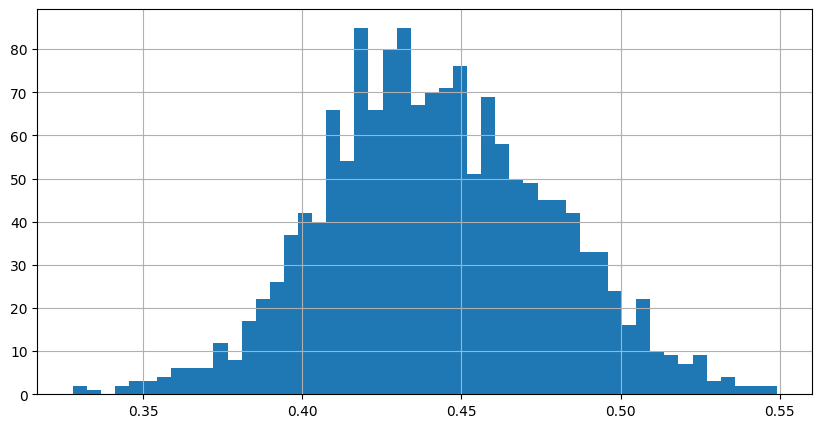

In [52]:
df_pitch_data['up_down_ratio'].hist(figsize=(10, 5), bins=50)